In [1]:
from sklearn.datasets import load_sample_image

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [18]:
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0]=1
filters[3,:,:,1]=1

In [19]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

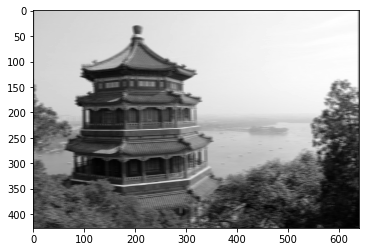

In [20]:
plt.imshow(outputs[0,:,:,1], cmap="gray")
plt.show()

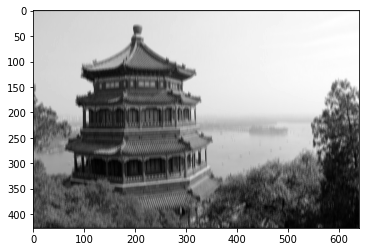

In [21]:
plt.imshow(outputs[0,:,:,0], cmap="gray")
plt.show()